## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
train = pd.read_csv("data/Train.csv", parse_dates=['Date_Customer'])
test = pd.read_csv("data/Test.csv", parse_dates=['Date_Customer'])

FileNotFoundError: ignored

## User Defined Functions

In [ ]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)


def object_count_plot(df):
    """
    Description : Plot countplot for all categorical features 
    present in the dataframe passed
    
    Argument : Dataframe
    """
    
    for var in df.columns:
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize=(12,5))
            g = sns.countplot(x=var,data=df)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.show()
            
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features
    in the dataframe passed
    
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

## Quick EDA

In [ ]:
quality_report(train)

,Total NaN,Percent of NaN,Nunique,Dtype
Disposable_Income,16,1.020408,1431,float64
ID,0,0.000000,1568,object
Amount_on_Fruits,0,0.000000,148,int64
Any_Complain,0,0.000000,2,int64
Cmp2Accepted,0,0.000000,2,int64
Cmp1Accepted,0,0.000000,2,int64
Cmp5Accepted,0,0.000000,2,int64
Cmp4Accepted,0,0.000000,2,int64
Cmp3Accepted,0,0.000000,2,int64
WebVisitsMonth,0,0.000000,16,int64


<AxesSubplot:xlabel='Response', ylabel='count'>

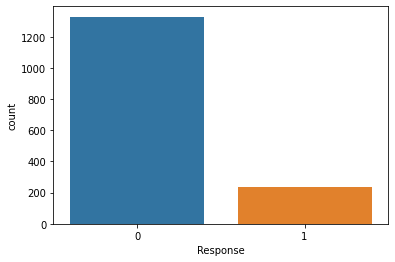

In [ ]:
sns.countplot(train['Response'])

In [ ]:
numeric_distribution_plot(train)

In [ ]:
train.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,29.091199,168.376276,37.166454,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,39.565637,233.419980,53.994951,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,4.000000,15.000000,3.000000,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,11.000000,64.000000,12.000000,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,36.000000,232.000000,49.250000,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,202.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
count,672.000000,664.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,1969.181548,63434.170482,0.406250,0.526786,57.744048,2.400298,4.279762,2.653274,5.992560,322.342262,29.794643,163.622024,38.363095,27.675595,44.681548,5.293155,0.072917,0.078869,0.055060,0.063988,0.014881,0.011905
std,12.116416,25276.585476,0.532259,0.545293,29.321893,1.919125,2.782585,2.622899,3.221797,328.037431,40.279494,206.752060,56.112424,42.275184,53.520249,2.328867,0.260193,0.269735,0.228266,0.244914,0.121167,0.108538
min,1894.000000,5313.600000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,44219.700000,0.000000,0.000000,33.000000,1.000000,2.000000,1.000000,3.000000,35.750000,5.000000,17.000000,2.750000,2.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,64007.400000,0.000000,1.000000,58.000000,2.000000,4.000000,2.000000,5.000000,209.500000,11.000000,73.000000,11.000000,9.000000,24.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1978.000000,83466.300000,1.000000,1.000000,84.000000,3.000000,6.000000,4.000000,8.000000,514.750000,36.000000,230.500000,50.000000,33.250000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,194876.400000,2.000000,2.000000,106.000000,15.000000,25.000000,11.000000,13.000000,1483.000000,202.000000,981.000000,250.000000,198.000000,321.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Disposable_Income'>

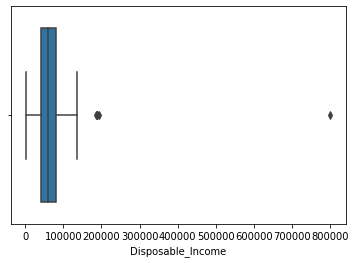

In [ ]:
sns.boxplot(train['Disposable_Income'])

In [ ]:
train.loc[train['Disposable_Income'] > 200000]

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
190,ID_VIUX07W2,1978,Graduation,Together,799999.2,1,0,2013-02-06,30,4,3,1,3,14,17,18,8,1,12,6,0,0,0,0,0,0,0


In [ ]:
train = train.drop(190)

## Missing Value Treatment

In [ ]:
train.Disposable_Income.fillna(train.Disposable_Income.median(), inplace=True)
test.Disposable_Income.fillna(test.Disposable_Income.median(), inplace= True)

## Data Preprocessing

In [ ]:
education = {
    "Graduation": 1,
    "PhD": 2,
    "Master": 3,
    "2n Cycle": 4,
    "Basic": 5
}

train.Education_Level = train.Education_Level.map(education)
test.Education_Level = test.Education_Level.map(education)

feature = train.columns.drop(['Response', 'ID', 'Date_Customer'])


mar = {
    "Married"  :   1,
"Together":    2,
"Single":      3,
"Divorced":    4,
"Widow":        5,
"Alone":         6,
"YOLO":          7,
"Absurd":        8

}

train.Marital_Status = train.Marital_Status.map(mar)
test.Marital_Status = test.Marital_Status.map(mar)

In [ ]:
test.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain'],
      dtype='object')

In [ ]:
train.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response'],
      dtype='object')

In [ ]:
test['Response'] = 'test'
data = pd.concat([train, test]).reset_index(drop = True)

## Feature Engineering

In [ ]:
max(data.Date_Customer)

Timestamp('2014-12-06 00:00:00')

In [ ]:
data['year'] = data.Date_Customer.dt.year
data['month'] = data.Date_Customer.dt.month
data['quater'] = data.Date_Customer.dt.quarter 


today = pd.to_datetime('2015-1-1')

data['duration_days'] = (today - data['Date_Customer']).dt.days
data['duration_months'] = ((today- data.Date_Customer)/np.timedelta64(1, 'M'))
data['duration_months'] = data['duration_months'].astype(int)

data['is_month_end'] = data.Date_Customer.dt.is_month_end.astype(int)
data['is_month_start'] = data.Date_Customer.dt.is_month_start.astype(int)

In [ ]:
data['total_children'] = data['No_of_Kids_in_home'] + data['No_of_Teen_in_home']

In [ ]:
poly_feature_1 = ['Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases']
poly_feature_2 = ['Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

poly1 = poly.fit_transform(data[poly_feature_1])
poly2 = poly.fit_transform(data[poly_feature_2])

In [ ]:
df_poly1 = pd.DataFrame(poly1, columns=[f"poly1_{i}" for i in range(poly1.shape[1])])
df_poly2 = pd.DataFrame(poly2, columns=[f"poly2_{i}" for i in range(poly2.shape[1])])

In [ ]:
data.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'year', 'month', 'quater',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start',
       'total_children'],
      dtype='object')

In [ ]:
new_data = pd.concat([data.drop('Date_Customer', axis = 1), df_poly1], axis = 1)
new_data = pd.concat([new_data, df_poly2], axis = 1)

In [ ]:
new_data['total_purchase'] = new_data[poly_feature_1].sum(axis = 1)
new_data['total_amount_on'] = new_data[poly_feature_2].sum(axis = 1)

In [ ]:
# new_data['year_month'] = 
new_data['year_month'] = new_data['year'].apply(str) + "_"  + new_data['month'].apply(str)

In [ ]:
# bin_label = [1,2,3,4,5]
new_data['Recency_bin'] = pd.qcut(new_data.Recency, q = [0, .2, .4, .6, .8, 1], labels=False)

In [ ]:
new_data['Recency' + '_mean_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('mean')
new_data['Recency' + '_std_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('std')
new_data['Recency' + '_max_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('max')
new_data['Recency' + '_min_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('min')

In [ ]:
new_data['year_month_int'], _ = pd.factorize(new_data['year_month'])

In [ ]:
new_data.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'year', 'month', 'quater',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start',
       'total_children', 'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4',
       'poly1_5', 'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9', 'poly2_0',
       'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5', 'poly2_6',
       'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11', 'poly2_12',
       'poly2_13', 'poly2_14', 'poly2_15', 'poly2_16', 'p

In [ ]:
features = new_data.select_dtypes(include = 'number').columns

In [ ]:
features

Index(['Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'year', 'month', 'quater',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start',
       'total_children', 'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4',
       'poly1_5', 'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9', 'poly2_0',
       'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5', 'poly2_6',
       'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11', 'poly2_12',
       'poly2_13', 'poly2_14', 'poly2_15', 'poly2_16', 'poly2_17', 'poly2_1

In [ ]:
train_df = new_data.loc[(new_data['Response'] != 'test')].reset_index(drop = True)
test_df = new_data.loc[(new_data['Response'] == 'test')].reset_index(drop = True)

In [ ]:
train_df['Response'] = train_df['Response'].apply(int)

In [ ]:
target = 'Response'

## Modelling

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
X = train_df[features]
y = train_df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline Models

In [ ]:
model = XGBClassifier(scale_pos_weight = 8,max_depth = 8, n_estimators = 500)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print(f1_score(prediction, y_test))

0.5617977528089888


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
model = LGBMClassifier(scale_pos_weight = 1,max_depth=6, n_estimators = 1000, learning_rate=0.01)
model.fit(X_train_res, y_train_res)
prediction = model.predict(X_test)

print(f1_score(prediction, y_test))

0.5360824742268041


## Modelling with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm =SMOTE(sampling_strategy={1:1000, 0:1400},random_state=2021)
X_, y_ = sm.fit_resample(train_df[features], train_df[target])

In [ ]:
oof_f1=[]
oof_predictions=[]

params = {'learning_rate': 0.3,
         'subsample': 0.7845527188607021,
         'colsample_bytree': 0.6474680443294045,
         'max_depth': 8,
         'scale_pos_weight': 1}

fold=StratifiedKFold(n_splits=5)#15#5#10

i=1
for train_index, test_index in fold.split(X_,y_):
        
    X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
    y_train, y_test = y_.iloc[train_index], y_.iloc[test_index]

    model = LGBMClassifier(**params, n_estimators=1000)

    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100
    preds=model.predict(X_test)

    print(f'F1, fold {i}: {f1_score(y_test,preds)}')
    i+=1                
    oof_f1.append(f1_score(y_test,preds))
    p2 = model.predict_proba(test_df[features])[:, -1]
    oof_predictions.append(p2)
    

print(np.mean(oof_f1))

F1, fold 1: 0.7142857142857143
F1, fold 2: 0.9148418491484186
F1, fold 3: 0.963680387409201
F1, fold 4: 0.9256594724220625
F1, fold 5: 0.9259259259259259
0.8888786698382644


Text(0.5, 1.0, 'Model features importance:')

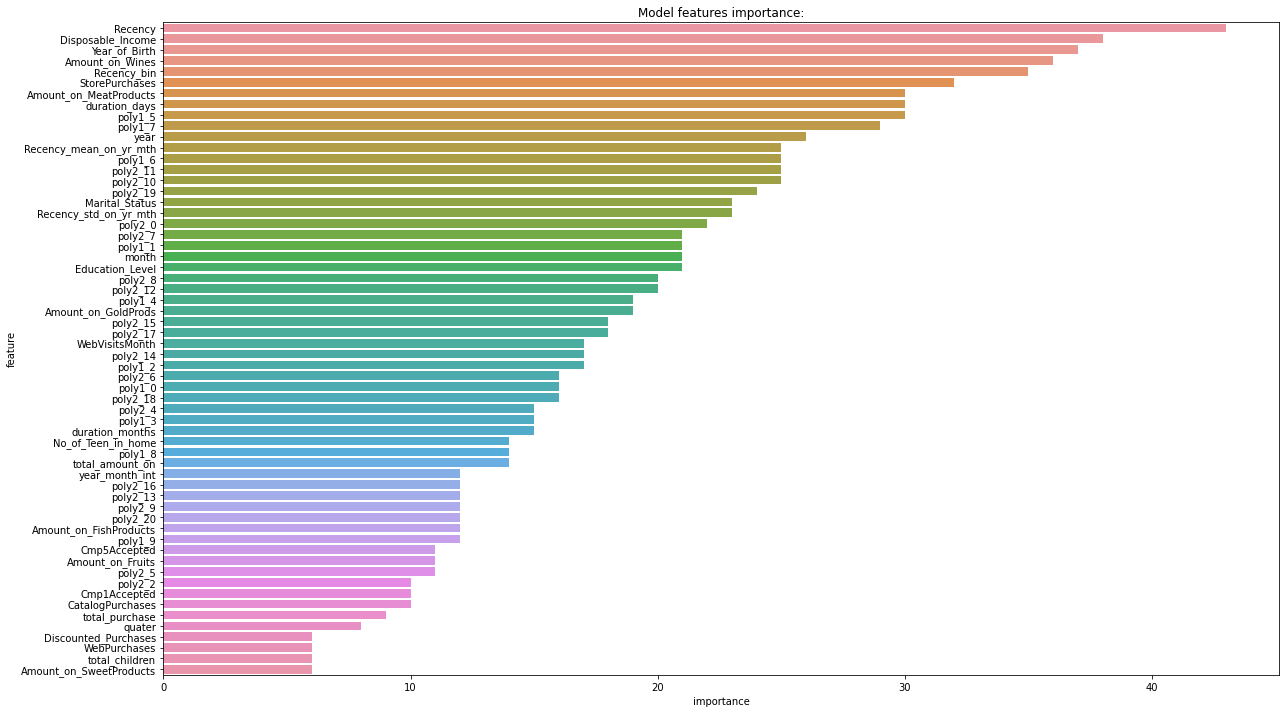

In [ ]:
# 0.7831404345536787
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = new_data[features].columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('Model features importance:')

## Feature Selection

In [ ]:
new_feat = feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50)['feature'].to_list()

## Hyperparameter Tuning

In [ ]:
import optuna

In [ ]:
X = train_df[features]
y = train_df[target]

In [ ]:
X = train_df[new_feat]

In [ ]:
def objective(trial):
    oof_f1=[]
    oof_predictions=[]


    param = {}
#     param['objective'] = "Logloss"
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.1, 0.001)
    param['depth'] = trial.suggest_int('depth', 3, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    param['iterations'] = trial.suggest_discrete_uniform("iterations", 200, 2000, 50)
    param['use_best_model'] = True
    param["colsample_bylevel"] =  trial.suggest_float("colsample_bylevel", 0.01, 0.1)
    param['random_state'] = 0
    param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 1, 10)
    param['bootstrap_type'] = trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"])
    param['logging_level'] = 'Silent'



    fold=StratifiedKFold(n_splits=5)#15#5#10
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = CatBoostClassifier(**param)
#         model = XGBClassifier(**param)
    

        model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200, verbose = False)#erly100
        preds=model.predict(X_test)

        oof_f1.append(f1_score(y_test,preds))

    return np.mean(oof_f1)

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10000)

[I 2021-11-12 09:43:58,147] A new study created in memory with name: no-name-d284dc56-d7d9-4678-bd8e-48dd39858c21
[I 2021-11-12 09:44:01,448] Trial 0 finished with value: 0.4864872812470173 and parameters: {'learning_rate': 0.036000000000000004, 'depth': 9, 'l2_leaf_reg': 4.5, 'min_child_samples': 1, 'iterations': 200.0, 'colsample_bylevel': 0.028646014636188405, 'scale_pos_weight': 8, 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 0.4864872812470173.
[I 2021-11-12 09:44:05,570] Trial 1 finished with value: 0.5981293473730449 and parameters: {'learning_rate': 0.041, 'depth': 3, 'l2_leaf_reg': 1.0, 'min_child_samples': 4, 'iterations': 1000.0, 'colsample_bylevel': 0.09435852708343026, 'scale_pos_weight': 2, 'bootstrap_type': 'Bayesian'}. Best is trial 1 with value: 0.5981293473730449.
[I 2021-11-12 09:44:08,212] Trial 2 finished with value: 0.5260791502115089 and parameters: {'learning_rate': 0.099, 'depth': 7, 'l2_leaf_reg': 1.0, 'min_child_samples': 16, 'iterations': 1700

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 3
Best trial:
  Value: 0.5981293473730449
  Params: 
    learning_rate: 0.041
    depth: 3
    l2_leaf_reg: 1.0
    min_child_samples: 4
    iterations: 1000.0
    colsample_bylevel: 0.09435852708343026
    scale_pos_weight: 2
    bootstrap_type: Bayesian


In [ ]:
new_feat2 = ['Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'year', 'month', 'quater',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start']

X = train_df[new_feat2]

In [ ]:
def objective(trial):
    oof_f1=[]
    oof_predictions=[]


    param = {}
#     param['objective'] = "Logloss"
#     param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.1, 0.001)
#     param['depth'] = trial.suggest_int('depth', 3, 15)
#     param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
#     param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
#     param['iterations'] = trial.suggest_discrete_uniform("iterations", 200, 2000, 50)
#     param['use_best_model'] = True
#     param["colsample_bylevel"] =  trial.suggest_float("colsample_bylevel", 0.01, 0.1)
#     param['random_state'] = 0
    
#     param['bootstrap_type'] = trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"])
#     param['logging_level'] = 'Silent'
    
    param["learning_rate"] = trial.suggest_float("learning_rate", 1e-2, 0.25, log=True)
#     param['reg_lambda'] = trial.suggest_loguniform("reg_lambda", 1e-8, 100.0)
#     param['reg_alpha'] = trial.suggest_loguniform("reg_alpha", 1e-8, 100.0)
    param['subsample'] = trial.suggest_float("subsample", 0.1, 1.0)
    param['colsample_bytree'] = trial.suggest_float("colsample_bytree", 0.1, 1.0)
    param['max_depth'] = trial.suggest_int("max_depth", 5, 20)
    param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 3, 10)




    fold=StratifiedKFold(n_splits=5)#15#5#10
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = LGBMClassifier(**param ,n_estimators=10000)

    
        model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100
        preds=model.predict(X_test)
        oof_f1.append(f1_score(y_test,preds))

    

    return np.mean(oof_f1)

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10000)

[I 2021-11-12 09:44:09,382] A new study created in memory with name: no-name-4cd4ed99-990c-46aa-9de4-3d4955e68e71
[I 2021-11-12 09:44:10,850] Trial 0 finished with value: 0.5870287001270807 and parameters: {'learning_rate': 0.20450013801019182, 'subsample': 0.32025097841830474, 'colsample_bytree': 0.21844219812502075, 'max_depth': 18, 'scale_pos_weight': 10}. Best is trial 0 with value: 0.5870287001270807.
[I 2021-11-12 09:44:14,072] Trial 1 finished with value: 0.6030874206965289 and parameters: {'learning_rate': 0.012739141774471972, 'subsample': 0.8569163782381528, 'colsample_bytree': 0.3522506136314564, 'max_depth': 10, 'scale_pos_weight': 7}. Best is trial 1 with value: 0.6030874206965289.
[I 2021-11-12 09:44:15,971] Trial 2 finished with value: 0.585776722298287 and parameters: {'learning_rate': 0.03882717359762249, 'subsample': 0.27470469495133554, 'colsample_bytree': 0.7947172194075652, 'max_depth': 7, 'scale_pos_weight': 4}. Best is trial 1 with value: 0.6030874206965289.


In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 3
Best trial:
  Value: 0.6030874206965289
  Params: 
    learning_rate: 0.012739141774471972
    subsample: 0.8569163782381528
    colsample_bytree: 0.3522506136314564
    max_depth: 10
    scale_pos_weight: 7


In [ ]:
trial.params

{'learning_rate': 0.012739141774471972,
 'subsample': 0.8569163782381528,
 'colsample_bytree': 0.3522506136314564,
 'max_depth': 10,
 'scale_pos_weight': 7}

In [ ]:
oof_f1=[]
lgb_oof_predictions=[]


param = trial.params



fold=StratifiedKFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X_,y_):
        
    X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
    y_train, y_test = y_.iloc[train_index], y_.iloc[test_index]
    
    model = LGBMClassifier(**param ,n_estimators=10000)

    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
    preds=model.predict(X_test)
    print("err: ",f1_score(y_test,preds))
    oof_f1.append(f1_score(y_test,preds))
    p2 = model.predict_proba(test_df[X_.columns])[:, -1]
    lgb_oof_predictions.append(p2)
    
print(np.mean(oof_f1))

err:  0.8350515463917526
err:  0.9129411764705883
err:  0.9569377990430622
err:  0.91415313225058
err:  0.9029345372460497
0.9044036382804066


In [ ]:
# Trial 3100 finished with value: 0.9395282013444826 and parameters: {'learning_rate': 0.042, 'depth': 3,
#                                                                   'l2_leaf_reg': 1.5, 'min_child_samples': 8, 
#                                                                   'iterations': 1400.0, 'colsample_bylevel': 0.03307446978765261,
#                                                                   'scale_pos_weight': 4, 'bootstrap_type': 'MVS'}. Best is trial 31 with value: 0.9795282013444826.

In [ ]:
# pred = np.max(oof_predictions, axis=0)

In [ ]:
pred_lgb = pd.DataFrame(lgb_oof_predictions).T

In [ ]:
pred_cat = pd.DataFrame(cat_oof_predictions).T

In [ ]:
pred_lgb.head()

,0,1,2,3,4
0,0.022152,0.030557,0.019294,0.028637,0.026282
1,0.357654,0.856093,0.742089,0.920183,0.786051
2,0.012190,0.000854,0.000055,0.002661,0.001016
3,0.248413,0.242642,0.273390,0.224459,0.244230
4,0.126614,0.032758,0.004628,0.057336,0.069057


In [ ]:
pred_cat.head()

,0,1,2,3,4
0,0.025114,0.295690,0.091996,0.063676,0.128109
1,0.552163,0.462138,0.572642,0.446766,0.407772
2,0.024030,0.009682,0.007385,0.006243,0.005405
3,0.648427,0.222845,0.632849,0.445094,0.526458
4,0.162552,0.145610,0.199396,0.027934,0.123657


In [ ]:
all_pred = pred_lgb.join(pred_cat, lsuffix="_lgb", rsuffix="_cat")

In [ ]:
all_pred.head()

,0_lgb,1_lgb,2_lgb,3_lgb,4_lgb,0_cat,1_cat,2_cat,3_cat,4_cat
0,0.022152,0.030557,0.019294,0.028637,0.026282,0.025114,0.295690,0.091996,0.063676,0.128109
1,0.357654,0.856093,0.742089,0.920183,0.786051,0.552163,0.462138,0.572642,0.446766,0.407772
2,0.012190,0.000854,0.000055,0.002661,0.001016,0.024030,0.009682,0.007385,0.006243,0.005405
3,0.248413,0.242642,0.273390,0.224459,0.244230,0.648427,0.222845,0.632849,0.445094,0.526458
4,0.126614,0.032758,0.004628,0.057336,0.069057,0.162552,0.145610,0.199396,0.027934,0.123657


## Submission

In [ ]:
mean_pred = all_pred.mean(axis = 1)

In [ ]:
pred = np.where(mean_pred > 0.45, 1 , 0)

In [ ]:
pd.Series(pred).head()

0    0
1    1
2    0
3    0
4    0
dtype: int64

In [ ]:
sub = pd.read_csv('data/SampleSubmission.csv')

In [ ]:
sub['Response'] = pred

In [ ]:
sub.to_csv('submit_lgb_cat_5fold.csv', index = False)